In [1]:
import numpy as np
import pandas as pd
import altair as alt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable("mimetype")
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable("data_server");

In [2]:
stinson2019_df = pd.read_pickle("../data/stinson2019/stinson2019_df")

In [3]:
stinson2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9929 entries, 0 to 9928
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   site            9929 non-null   object        
 1   date            9929 non-null   datetime64[ns]
 2   tree            9929 non-null   object        
 3   species         9929 non-null   object        
 4   tap             9929 non-null   object        
 5   sugar           8139 non-null   float64       
 6   sap_wt          9296 non-null   float64       
 7   year            9929 non-null   datetime64[ns]
 8   site_id         9929 non-null   object        
 9   tree_id         9929 non-null   object        
 10  tree_record_id  9929 non-null   object        
 11  tap_record_id   9929 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 931.0+ KB


In [4]:
stinson2019_df["jd"] = pd.DatetimeIndex(stinson2019_df["date"]).dayofyear
stinson2019_df["year_int"] = pd.DatetimeIndex(stinson2019_df["year"]).year
stinson2019_df["sugar_wt"] = stinson2019_df["sugar"]/100 * stinson2019_df["sap_wt"]
stinson2019_df["yearly_sap"] = np.nan
stinson2019_df["yearly_sugar"] = np.nan
stinson2019_df['tree_tap'] = stinson2019_df['tree']+ '_' + stinson2019_df['tap']
stinson2019_df = stinson2019_df.sort_values(by="date")

abs_measurement = 0

for year in stinson2019_df["year_int"].unique():
    year_df = stinson2019_df[stinson2019_df["year_int"] == year]

    for site in stinson2019_df[stinson2019_df["year_int"] == year]["site"].unique():
        for tree in stinson2019_df[
            (stinson2019_df["year_int"] == year) & (stinson2019_df["site"] == site)
        ]["tree"].unique():
            for tap in stinson2019_df[
                (stinson2019_df["year_int"] == year)
                & (stinson2019_df["site"] == site)
                & (stinson2019_df["tree"] == tree)
            ]["tap"].unique():
                tap_yr_index = stinson2019_df.index[
                    (stinson2019_df["year_int"] == year)
                    & (stinson2019_df["site"] == site)
                    & (stinson2019_df["tree"] == tree)
                    & (stinson2019_df["tap"] == tap)
                ].tolist()
                yearly_sap = 0
                yearly_sugar = 0
                for measurement in tap_yr_index:
                    yearly_sap = np.nansum(
                        [yearly_sap, stinson2019_df.loc[measurement, "sap_wt"]]
                    )
                    yearly_sugar = np.nansum(
                        [
                            yearly_sugar,
                            stinson2019_df.loc[measurement, "sap_wt"]
                            * stinson2019_df.loc[measurement, "sugar"]/100,
                        ]
                    )
                    stinson2019_df.loc[measurement, "yearly_sap"] = yearly_sap
                    stinson2019_df.loc[measurement, "yearly_sugar"] = yearly_sugar


#     yearly_sap = 0
#     yearly_sugar = 0
#     for measurement in list(range(len(year_df))):
#         yearly_sap+=stinson2019_df.iloc[abs_measurement,6]
#         yearly_sugar+=stinson2019_df.iloc[abs_measurement,6]*stinson2019_df.iloc[abs_measurement,5]
#         stinson2019_df.iloc[abs_measurement,13]=yearly_sap
#         stinson2019_df.iloc[abs_measurement,14]=yearly_sugar
#         abs_measurement+=1

In [16]:
stinson2019_df.describe(include='all', datetime_is_numeric=True)

,site,date,tree,species,tap,sugar,sap_wt,year,site_id,tree_id,tree_record_id,tap_record_id,jd,year_int,sugar_wt,yearly_sap,yearly_sugar,tree_tap
count,9929,9929,9929,9929,9929,8139.000000,9296.000000,9929,9929,9929,9929,9929,9929.000000,9929.000000,7791.000000,9929.000000,9929.000000,9929
unique,6,NaN,199,2,3,NaN,NaN,NaN,6,199,6799,9923,NaN,NaN,NaN,NaN,NaN,265
top,Harvard Forest,NaN,HF22,ACSA,A,NaN,NaN,NaN,HF,HF.ACSA.HF7,SMM.ACSA.SM10.2015-03-16,DR.ACRU.RM9.A.2016-02-20,NaN,NaN,NaN,NaN,NaN,HF4_A
freq,5299,NaN,266,8425,6800,NaN,NaN,NaN,5299,266,3,2,NaN,NaN,NaN,NaN,NaN,133
mean,NaN,2015-06-20 19:29:39.877127424,NaN,NaN,NaN,2.452807,2.953028,2015-04-05 16:11:50.645583616,NaN,NaN,NaN,NaN,77.137375,2015.258838,0.082704,26.232810,0.642445,NaN
min,NaN,2012-02-16 00:00:00,NaN,NaN,NaN,0.000000,0.010000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,30.000000,2012.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2014-04-02 00:00:00,NaN,NaN,NaN,2.000000,0.630000,2014-01-01 00:00:00,NaN,NaN,NaN,NaN,61.000000,2014.000000,0.024480,5.670718,0.114620,NaN
50%,NaN,2016-02-07 00:00:00,NaN,NaN,NaN,2.400000,1.920000,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,78.000000,2016.000000,0.057000,14.940000,0.340745,NaN
75%,NaN,2016-04-21 00:00:00,NaN,NaN,NaN,2.900000,4.102500,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,92.000000,2016.000000,0.112980,36.200000,0.881420,NaN
max,NaN,2017-05-04 00:00:00,NaN,NaN,NaN,7.300000,30.120000,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,127.000000,2017.000000,0.792680,183.740000,4.984340,NaN


In [9]:
a = alt.Chart(
    stinson2019_df[
        (stinson2019_df["tree"] == "HF1")
        & (stinson2019_df["year_int"] == 2012)
    ]
).mark_line().encode(
    y="yearly_sap",
    x="date",
    color=alt.Color("tap", scale=alt.Scale(scheme="category10")),
)

In [10]:
b = alt.Chart(
    stinson2019_df[
        (stinson2019_df["tree"] == "HF1")
        & (stinson2019_df["year_int"] == 2012)
    ]
).mark_line(color='black').encode(
    y="yearly_sap_agg:Q",
    x="date",
).transform_aggregate(
    yearly_sap_agg='sum(yearly_sap)',
    groupby=['date']
)

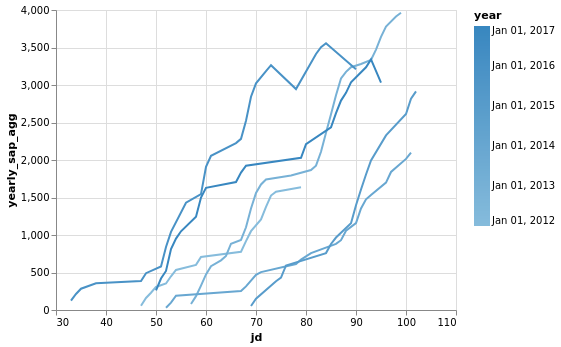

In [11]:
alt.Chart(
    stinson2019_df[
        (stinson2019_df["site_id"] == "HF")
    ]
).mark_line(color='black').encode(
    y="yearly_sap_agg:Q",
    x="jd",
    color = 'year'
).transform_aggregate(
    yearly_sap_agg='sum(yearly_sap)',
    groupby=['jd', 'year']
)

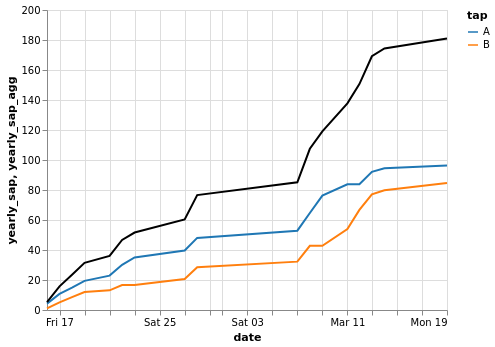

In [12]:
a+b

In [13]:
stinson2019_df[
    (stinson2019_df["tree"] == "HF1")
    & (stinson2019_df["year_int"] == 2012)
    & ((stinson2019_df["tap"] == "A") | (stinson2019_df["tap"] == "B"))].head()

,site,date,tree,species,tap,sugar,sap_wt,year,site_id,tree_id,tree_record_id,tap_record_id,jd,year_int,sugar_wt,yearly_sap,yearly_sugar,tree_tap
0,Harvard Forest,2012-02-16,HF1,ACSA,A,2.7,4.24,2012-01-01,HF,HF.ACSA.HF1,HF.ACSA.HF1.2012-02-16,HF.ACSA.HF1.A.2012-02-16,47,2012,0.11448,4.24,0.11448,HF1_A
1,Harvard Forest,2012-02-16,HF1,ACSA,B,2.4,1.08,2012-01-01,HF,HF.ACSA.HF1,HF.ACSA.HF1.2012-02-16,HF.ACSA.HF1.B.2012-02-16,47,2012,0.02592,1.08,0.02592,HF1_B
24,Harvard Forest,2012-02-17,HF1,ACSA,B,2.3,3.96,2012-01-01,HF,HF.ACSA.HF1,HF.ACSA.HF1.2012-02-17,HF.ACSA.HF1.B.2012-02-17,48,2012,0.09108,5.04,0.11700,HF1_B
23,Harvard Forest,2012-02-17,HF1,ACSA,A,2.6,6.47,2012-01-01,HF,HF.ACSA.HF1,HF.ACSA.HF1.2012-02-17,HF.ACSA.HF1.A.2012-02-17,48,2012,0.16822,10.71,0.28270,HF1_A
47,Harvard Forest,2012-02-18,HF1,ACSA,B,2.4,3.54,2012-01-01,HF,HF.ACSA.HF1,HF.ACSA.HF1.2012-02-18,HF.ACSA.HF1.B.2012-02-18,49,2012,0.08496,8.58,0.20196,HF1_B


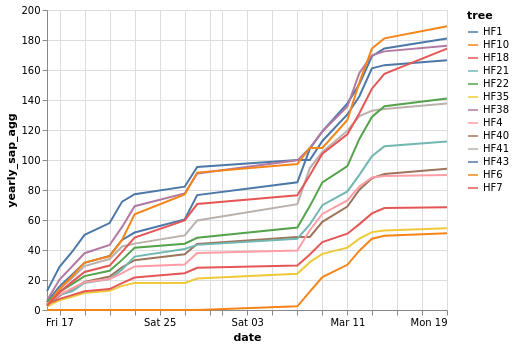

In [14]:
alt.Chart(
    stinson2019_df[(stinson2019_df["year_int"] == 2012)
    ]
).mark_line(color='black').encode(
    y="yearly_sap_agg:Q",
    x="date",
    color='tree'
).transform_aggregate(
    yearly_sap_agg='sum(yearly_sap)',
    groupby=['date','tree']
)

In [11]:
stinson2019_df[(stinson2019_df["tree"] == "HF1") & (stinson2019_df["year_int"] == 2012) & (stinson2019_df['tap']=='A')]

,site,date,tree,species,tap,sugar,sap_wt,year,site_id,tree_id,tree_record_id,tap_record_id,jd,year_int,sugar_wt,yearly_sap,yearly_sugar,tree_tap
0,Harvard Forest,2012-02-16,HF1,ACSA,A,2.7,4.24,2012-01-01,HF,HF.ACSA.HF1,HF.ACSA.HF1.2012-02-16,HF.ACSA.HF1.A.2012-02-16,47,2012,0.11448,4.24,0.11448,HF1_A
23,Harvard Forest,2012-02-17,HF1,ACSA,A,2.6,6.47,2012-01-01,HF,HF.ACSA.HF1,HF.ACSA.HF1.2012-02-17,HF.ACSA.HF1.A.2012-02-17,48,2012,0.16822,10.71,0.28270,HF1_A
46,Harvard Forest,2012-02-18,HF1,ACSA,A,2.6,4.22,2012-01-01,HF,HF.ACSA.HF1,HF.ACSA.HF1.2012-02-18,HF.ACSA.HF1.A.2012-02-18,49,2012,0.10972,14.93,0.39242,HF1_A
69,Harvard Forest,2012-02-19,HF1,ACSA,A,2.6,4.50,2012-01-01,HF,HF.ACSA.HF1,HF.ACSA.HF1.2012-02-19,HF.ACSA.HF1.A.2012-02-19,50,2012,0.11700,19.43,0.50942,HF1_A
92,Harvard Forest,2012-02-21,HF1,ACSA,A,2.3,3.50,2012-01-01,HF,HF.ACSA.HF1,HF.ACSA.HF1.2012-02-21,HF.ACSA.HF1.A.2012-02-21,52,2012,0.08050,22.93,0.58992,HF1_A
115,Harvard Forest,2012-02-22,HF1,ACSA,A,2.6,7.18,2012-01-01,HF,HF.ACSA.HF1,HF.ACSA.HF1.2012-02-22,HF.ACSA.HF1.A.2012-02-22,53,2012,0.18668,30.11,0.77660,HF1_A
138,Harvard Forest,2012-02-23,HF1,ACSA,A,2.5,4.94,2012-01-01,HF,HF.ACSA.HF1,HF.ACSA.HF1.2012-02-23,HF.ACSA.HF1.A.2012-02-23,54,2012,0.12350,35.05,0.90010,HF1_A
161,Harvard Forest,2012-02-27,HF1,ACSA,A,2.6,4.62,2012-01-01,HF,HF.ACSA.HF1,HF.ACSA.HF1.2012-02-27,HF.ACSA.HF1.A.2012-02-27,58,2012,0.12012,39.67,1.02022,HF1_A
184,Harvard Forest,2012-02-28,HF1,ACSA,A,2.5,8.40,2012-01-01,HF,HF.ACSA.HF1,HF.ACSA.HF1.2012-02-28,HF.ACSA.HF1.A.2012-02-28,59,2012,0.21000,48.07,1.23022,HF1_A
207,Harvard Forest,2012-03-07,HF1,ACSA,A,2.2,4.82,2012-01-01,HF,HF.ACSA.HF1,HF.ACSA.HF1.2012-03-07,HF.ACSA.HF1.A.2012-03-07,67,2012,0.10604,52.89,1.33626,HF1_A


In [17]:
HF_weather = pd.read_csv('../data/HF_weather/raw/hf001-08-hourly-m.csv', parse_dates=['datetime'])

/home/steffen/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3,5,7,9,11,13,15,17,19,21,23,25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [19]:
HF_weather.describe(include='all', datetime_is_numeric=True)

,datetime,jd,airt,f.airt,rh,f.rh,dewp,f.dewp,prec,f.prec,...,wres,f.wres,wdir,f.wdir,wdev,f.wdev,gspd,f.gspd,s10t,f.s10t
count,561024,561024.000000,560858.00000,121,560855.000000,121,560848.000000,128,554798.000000,7053,...,560855.000000,1330,560855.000000,1330,560855.000000,1330,560855.000000,1330,560689.000000,287
unique,NaN,NaN,NaN,2,NaN,1,NaN,1,NaN,2,...,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1
top,NaN,NaN,NaN,M,NaN,M,NaN,M,NaN,M,...,NaN,Q,NaN,Q,NaN,Q,NaN,Q,NaN,M
freq,NaN,NaN,NaN,118,NaN,121,NaN,128,NaN,6178,...,NaN,1209,NaN,1209,NaN,1209,NaN,1209,NaN,287
mean,2013-01-01 00:13:14.359599616,183.124685,8.41410,NaN,72.846133,NaN,3.178709,NaN,0.037225,NaN,...,1.382117,NaN,191.346883,NaN,27.591046,NaN,4.261202,NaN,11.039639,NaN
min,2005-01-01 00:15:00,1.000000,-27.50000,NaN,8.000000,NaN,-34.800000,NaN,0.000000,NaN,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,-0.500000,NaN
25%,2009-01-01 00:26:15,92.000000,0.10000,NaN,58.000000,NaN,-4.900000,NaN,0.000000,NaN,...,0.700000,NaN,88.000000,NaN,22.000000,NaN,2.200000,NaN,2.500000,NaN
50%,2013-01-01 00:22:30,183.000000,8.80000,NaN,76.000000,NaN,3.700000,NaN,0.000000,NaN,...,1.200000,NaN,211.000000,NaN,27.000000,NaN,3.800000,NaN,10.700000,NaN
75%,2017-01-01 00:03:45,274.000000,17.10000,NaN,92.000000,NaN,12.600000,NaN,0.000000,NaN,...,1.900000,NaN,274.000000,NaN,33.000000,NaN,5.800000,NaN,18.900000,NaN
max,2021-01-01 00:00:00,366.000000,35.20000,NaN,100.000000,NaN,25.100000,NaN,28.200000,NaN,...,8.200000,NaN,360.000000,NaN,80.000000,NaN,23.400000,NaN,26.900000,NaN


In [13]:
c = alt.Chart(HF_weather[(HF_weather['datetime'].dt.year==2012) & ((HF_weather['jd'] < 81) & (HF_weather['jd'] > 47))]).mark_line().encode(x='datetime',y='airt')

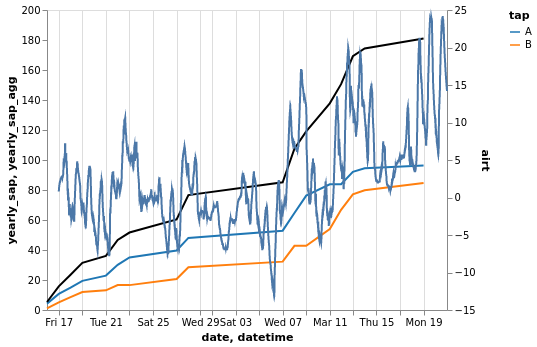

In [14]:
alt.layer((a+b), c).resolve_scale(
    y = 'independent'
)

In [15]:
stinson2019_df.groupby(['year','site_id'],dropna=True)['sap_wt'].sum()

year        site_id
2012-01-01  HF         1636.280000
2013-01-01  HF         3963.870000
2014-01-01  DOF         487.650000
            HF         2099.130000
            QC          314.660000
            SMM         992.270000
2015-01-01  DOF         353.640000
            HF         2915.690000
            QC          257.810000
            SMM         999.520000
2016-01-01  DOF         942.045000
            DR          359.543935
            HF         3577.670000
            INDU        267.870000
            QC          645.334000
            SMM        2192.870000
2017-01-01  DOF         459.990000
            DR          217.360000
            HF         3378.090000
            INDU        379.900000
            QC          450.260000
            SMM         559.900000
Name: sap_wt, dtype: float64

In [16]:
stinson_2019_byforest = 

SyntaxError: invalid syntax (<ipython-input-16-71e6a5ddfaf8>, line 1)